In [1]:
import json
import string
import re
import pandas as pd
data = [json.loads(line) for line in open(r"C:\Users\ranjith_n\Downloads\fake_news.json", 'r')]

In [2]:
df=pd.DataFrame()

In [3]:
df['headline']=""

df['article_link']=""

df['is_sarcastic']=""

In [4]:
df.columns

Index(['headline', 'article_link', 'is_sarcastic'], dtype='object')

In [5]:
df['headline']= [data[i]['headline'] for i in range(len(data))]
df['article_link']=[data[i]['article_link'] for i in range(len(data))]
df['is_sarcastic']=[data[i]['is_sarcastic'] for i in range(len(data))]

In [6]:
df


,headline,article_link,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,1
1,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,0
2,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,0
3,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,1
4,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,1
5,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...,0
6,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...,0
7,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...,1
8,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...,1
9,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...,0


# Preprocessing PHASE

In [7]:
df.head(10)

,headline,article_link,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,1
1,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,0
2,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,0
3,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,1
4,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,1
5,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...,0
6,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...,0
7,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...,1
8,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...,1
9,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...,0


In [8]:
df.info()
#as we can see there is no non null objects so we can go with the preprocessing stage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
headline        28619 non-null object
article_link    28619 non-null object
is_sarcastic    28619 non-null int64
dtypes: int64(1), object(2)
memory usage: 670.8+ KB


In [9]:
#"Meet" and "meet" both are considered different in classification so converting the inputs to lower case
df['headline'] = df['headline'].apply(lambda x: x.lower())
df['headline']=df['headline'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [10]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
df['headline'] = df['headline'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['headline'] = df['headline'].apply(lambda x: lemmatizer.lemmatize(x))

In [11]:
df['headline'].head(5)

0    thirtysomething scientists unveil doomsday clo...
1    dem rep totally nails why congress is falling ...
2      eat your veggies  deliciously different recipes
3    inclement weather prevents liar from getting t...
4    mother comes pretty close to using word stream...
Name: headline, dtype: object

In [12]:
#Removing punctuation in the input string 

import string

def clear_punctuation(inpustr):
    clean_list = [char for char in inpustr if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [13]:
df['headline'] = df['headline'].apply(clear_punctuation)

In [14]:
df['headline'].head(5)

0    thirtysomething scientists unveil doomsday clo...
1    dem rep totally nails why congress is falling ...
2      eat your veggies  deliciously different recipes
3    inclement weather prevents liar from getting t...
4    mother comes pretty close to using word stream...
Name: headline, dtype: object

In [15]:
#Removing stopwords in the input string

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['headline'].apply(lambda x: [item for item in x.split() if item not in stop])

0        [thirtysomething, scientists, unveil, doomsday...
1        [dem, rep, totally, nails, congress, falling, ...
2          [eat, veggies, deliciously, different, recipes]
3        [inclement, weather, prevents, liar, getting, ...
4        [mother, comes, pretty, close, using, word, st...
5                                     [white, inheritance]
6                        [ways, file, taxes, less, stress]
7        [richard, bransons, globalwarming, donation, n...
8        [shadow, government, getting, large, meet, mar...
9                          [lots, parents, know, scenario]
10       [lesbian, considered, father, indiana, amazing...
11       [amanda, peet, told, daughter, sex, special, hug]
12           [know, regarding, current, treatments, ebola]
13       [chris, christie, suggests, hillary, clinton, ...
14       [ford, develops, new, suv, runs, purely, gasol...
15       [uber, ceo, travis, kalanick, stepping, trump,...
16       [area, boy, enters, jumpingandtouchingtopsofdo.

# EDA PHASE

In [16]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in df.headline])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False,background_color='white').generate(all_words)

# word cloud for the entire input

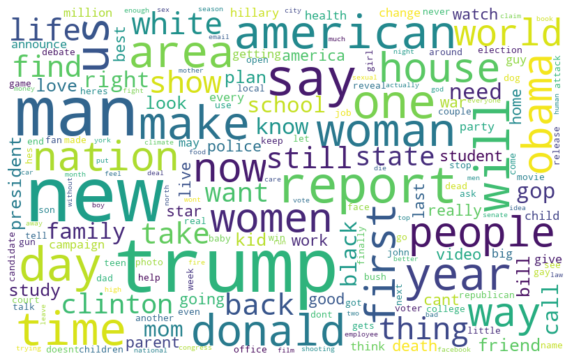

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
real=df[df['is_sarcastic']==0]['headline']
fake =df[df['is_sarcastic']==1]['headline']

In [19]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in real])

realwordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False,background_color='white').generate(all_words)

# word cloud for  Sarcastic inputs

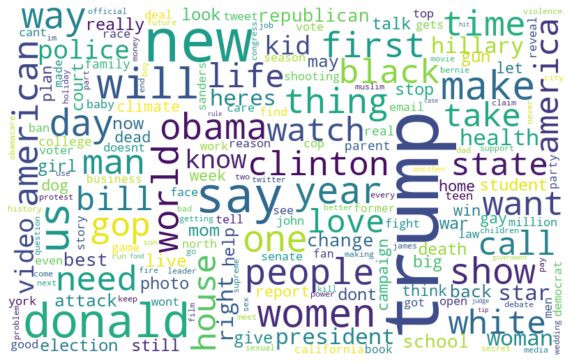

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(realwordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#as we can see trump,people,report,women,show,new are the most used words

In [21]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in fake])

fakewordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False,background_color='white').generate(all_words)

# word cloud for non Sarcastic inputs

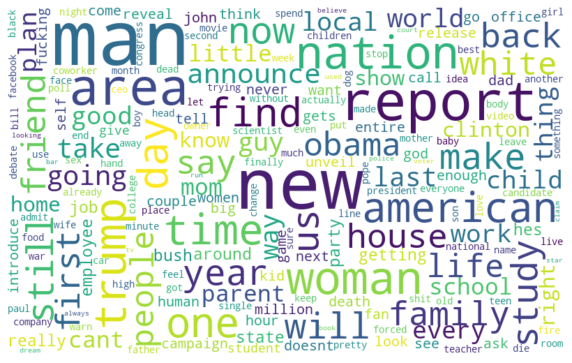

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(fakewordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#as we can see man,new,report,woman,american,trump are the most used words

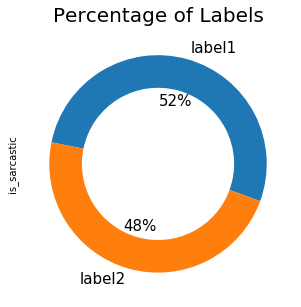

In [23]:
plt.figure(figsize=(5,5))
plt.title('Percentage of Labels', fontsize=20)
df.is_sarcastic.value_counts().plot(kind='pie', labels=['label1','label2'],
                              wedgeprops=dict(width=.3), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000217CAE5C2B0>,
      dtype=object)

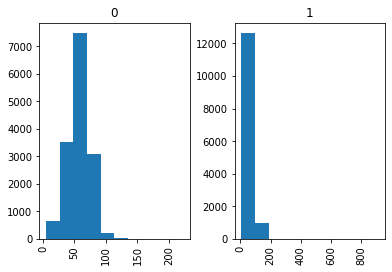

In [24]:
df['headline'].str.len().hist(by=df['is_sarcastic'])

In [25]:
import collections


realwords=[x for y in df[df['is_sarcastic']==0]['headline'] for x in y.split()]
fakewords=[x for y in df[df['is_sarcastic']==1]['headline'] for x in y.split()]
word_counts = collections.Counter(realwords)
realwordsdict = dict(sorted(word_counts.items(),
                           key=lambda item: item[1],
                           reverse=True))
fakewordsdict = dict(sorted(collections.Counter(fakewords).items(),
                           key=lambda item: item[1],
                           reverse=True))


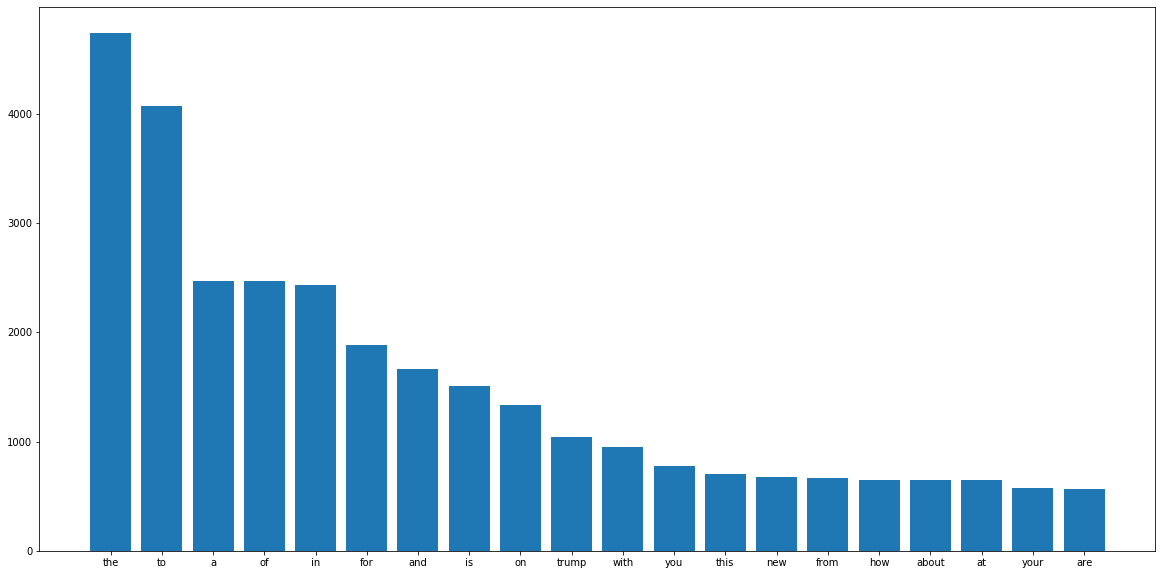

In [26]:
# plotting the top 20 frequent words in the real news
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


data = list(realwordsdict.values())[0:20]
plt.figure(figsize=(20,10))
plt.bar(list(realwordsdict.keys())[0:20], data)
plt.show()

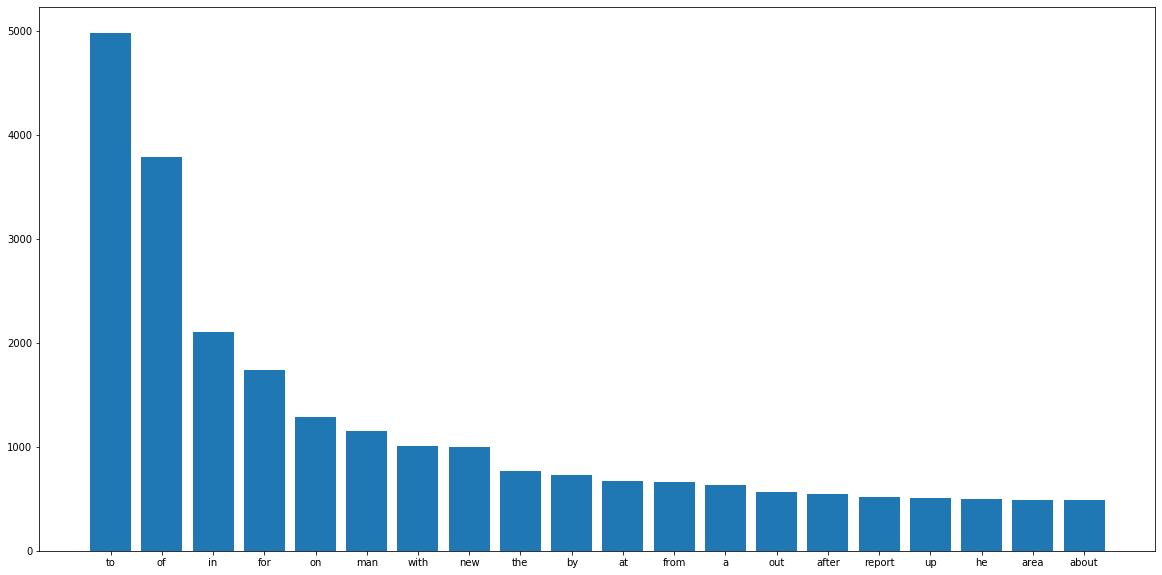

In [27]:
# plotting the top 20 frequent words in the FAKE  headlines
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data = list(fakewordsdict.values())[0:20]
plt.figure(figsize=(20,10))
plt.bar(list(fakewordsdict.keys())[0:20], data)
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

#Creating the bag of words
bow_article = CountVectorizer().fit(df['headline'])

article_vect = bow_article.transform(df['headline'])

In [29]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(article_vect)
news_tfidf = tfidf_transformer.transform(article_vect)
print(news_tfidf.shape)

(28619, 28686)


In [30]:
#We will use 20% of the data to train the models.

from sklearn.model_selection import train_test_split
X = news_tfidf
y = df['is_sarcastic']

X_train, X_test, Y_train,Y_test= train_test_split(X, y, test_size=0.25)

# Multinomial Naive Bayes 

In [31]:
#Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

fakenews_detector = MultinomialNB().fit(X_train, Y_train)

In [32]:
#Model Evaluation
predictions = fakenews_detector.predict(X_test)
#print(predictions)

In [33]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3756
           1       0.88      0.77      0.82      3399

    accuracy                           0.84      7155
   macro avg       0.84      0.84      0.84      7155
weighted avg       0.84      0.84      0.84      7155



In [34]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

#fake_detector_svc = SGDClassifier().fit(X_train, Y_train)
fake_detector_svc  = SGDClassifier(loss='hinge',class_weight='balanced')
clf =fake_detector_svc .fit(X_train, Y_train)
calibrator = CalibratedClassifierCV(clf, cv='prefit')
model=calibrator.fit(X_train, Y_train)

In [35]:
prediction_svc = fake_detector_svc.predict(X_test)

In [36]:
print (classification_report(Y_test, prediction_svc))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      3756
           1       0.81      0.88      0.84      3399

    accuracy                           0.84      7155
   macro avg       0.84      0.85      0.84      7155
weighted avg       0.85      0.84      0.84      7155



# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
fake_detector_logistic = LogisticRegression().fit(X_train, Y_train)

c:\users\ranjith_n\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
predictions_log_regtrain = fake_detector_logistic.predict(X_train)
predictions_log_reg = fake_detector_logistic.predict(X_test)
print (classification_report(Y_test, predictions_log_reg))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      3756
           1       0.82      0.86      0.84      3399

    accuracy                           0.84      7155
   macro avg       0.84      0.84      0.84      7155
weighted avg       0.84      0.84      0.84      7155



# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
ranclf = RandomForestClassifier()
ranclf.fit(X_train, Y_train)
predictionranclf = ranclf.predict(X_test)

c:\users\ranjith_n\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
y_test_probs = fake_detector_logistic.predict_proba(X_test)[:,1]
svc_testprobs=calibrator.predict_proba(X_test)[:,1]
ranforest_testprobs=ranclf.predict_proba(X_test)[:,1]
Naivebayesprobs=fakenews_detector.predict_proba(X_test)[:,1]

In [41]:
from sklearn.metrics import precision_recall_curve

In [42]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_test_probs)
svcprecision,svcrecall, thresholds = precision_recall_curve(Y_test, svc_testprobs)
ranprecision,ranrecall, thresholds = precision_recall_curve(Y_test, ranforest_testprobs)
naiveprecision,naiverecall, thresholds = precision_recall_curve(Y_test, Naivebayesprobs)

# Calculating the ACCURACY score for all the classification algorithms

In [43]:
from sklearn.metrics import accuracy_score
print("Logistic regression Accuracy score is {}".format(round(accuracy_score(Y_test, fake_detector_logistic.predict(X_test))*100 ,2)))
print("Support vector Accuracy score is {}".format(round(accuracy_score(Y_test, fake_detector_svc.predict(X_test))*100 ,2)))
print("random forest Accuracy score is {}".format(round(accuracy_score(Y_test, predictionranclf)*100 ,2)))
print("Naive Bayes Accuracy score is {}".format(round(accuracy_score(Y_test, predictions)*100 ,2)))

Logistic regression Accuracy score is 84.11
Support vector Accuracy score is 84.33
random forest Accuracy score is 79.15
Naive Bayes Accuracy score is 83.94


# Accuracy Score Plot

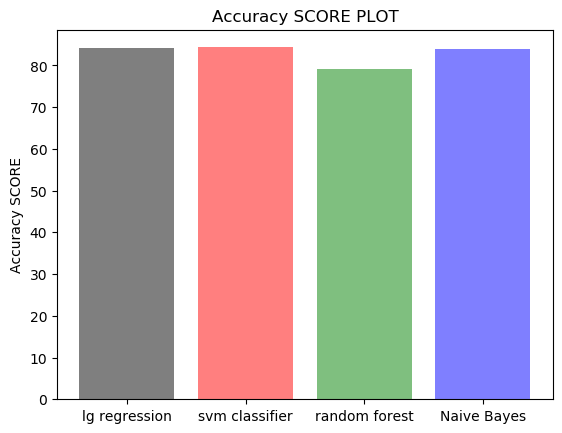

In [44]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ("lg regression","svm classifier","random forest","Naive Bayes")
y_pos = np.arange(len(objects))
performance = [round(accuracy_score(Y_test, fake_detector_logistic.predict(X_test))*100 ,2),round(accuracy_score(Y_test, fake_detector_svc.predict(X_test))*100 ,2),round(accuracy_score(Y_test, predictionranclf)*100 ,2),round(accuracy_score(Y_test, predictions)*100 ,2)]

plt.bar(y_pos, performance, align='center', alpha=0.5,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy SCORE')
plt.title('Accuracy SCORE PLOT')

plt.show()

# PRECISION RECALL CURVE FOR THE CLASSIFICATION ALGORITHMS

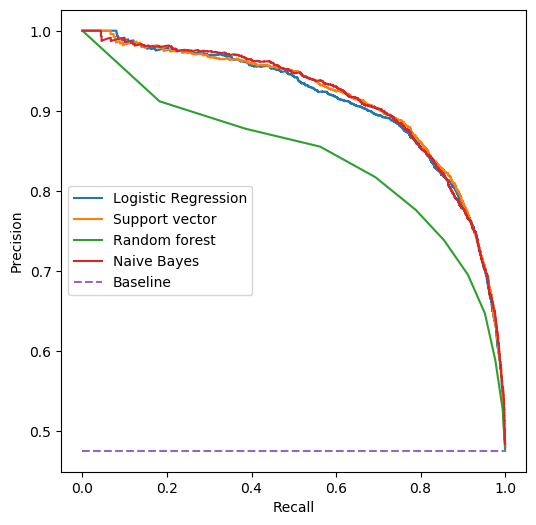

In [45]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Logistic Regression')
ax.plot(svcrecall, svcprecision, label='Support vector')
ax.plot(ranrecall, ranprecision, label='Random forest')
ax.plot(naiverecall, naiveprecision, label='Naive Bayes')
baseline = len(Y_test[Y_test==1]) / len(Y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');
#Since the result labels counts are not same,it is biased 
#if it is not biased we can evaluate the model with ROc curve and the accuracy score.
#since the labels are biased so we will be choosing the best model with the help Precision-Recall curve and the Auc score 

# Calculating the AUC score for all the classification algorithms

In [46]:
from sklearn.metrics import auc
lrauc = round(auc(recall, precision)*100 ,2)
svcauc = round(auc(svcrecall,svcprecision)*100 ,2)
ranauc = round(auc(ranrecall,ranprecision)*100 , 2)
naiveauc = round(auc(naiverecall,naiveprecision)*100 , 2)
print("Logistic regression Auc Score is ==> {}".format(lrauc))
print("Support vector classifier Auc Score is ==> {}".format(svcauc))
print("random forest classifier Auc Score is ==> {}".format(ranauc))
print("Naive Bayes Classifier Auc Score is ==> {}".format(naiveauc))
# with the Below Score we can conclude logistic regression and Suport vector classifier and naive bayes classifier is performing well 

Logistic regression Auc Score is ==> 90.92
Support vector classifier Auc Score is ==> 91.22
random forest classifier Auc Score is ==> 84.05
Naive Bayes Classifier Auc Score is ==> 91.26


# plot for Auc Curve

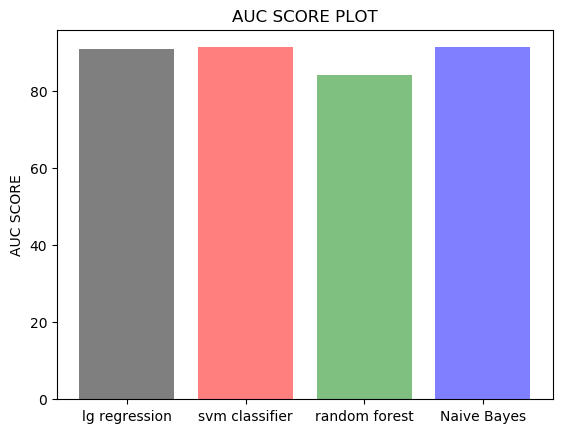

In [47]:

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ("lg regression","svm classifier","random forest","Naive Bayes")
y_pos = np.arange(len(objects))
performance = [lrauc,svcauc,ranauc,naiveauc]

plt.bar(y_pos, performance, align='center', alpha=0.5,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, objects)
plt.ylabel('AUC SCORE')
plt.title('AUC SCORE PLOT')

plt.show()

# Comparison plot for the Accuracy and AUC Score

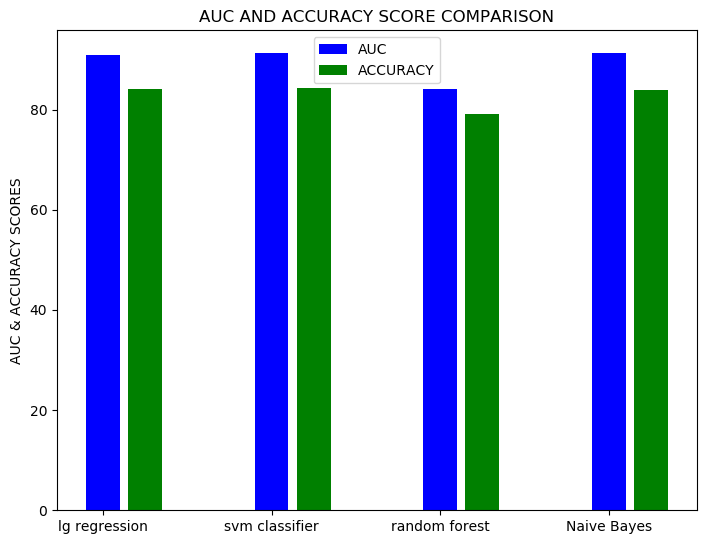

In [48]:
import numpy as np
import matplotlib.pyplot as plt
data = [[lrauc,svcauc,ranauc,naiveauc],
[round(accuracy_score(Y_test, fake_detector_logistic.predict(X_test))*100 ,2),round(accuracy_score(Y_test, fake_detector_svc.predict(X_test))*100 ,2),round(accuracy_score(Y_test, predictionranclf)*100 ,2),round(accuracy_score(Y_test, predictions)*100 ,2)]]
X = np.arange(4)
objects = ("lg regression","svm classifier","random forest","Naive Bayes")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(np.arange(len(objects)), ("lg regression","svm classifier","random forest","Naive Bayes"))
ax.bar(X + 0.00, data[0], color = 'b', width = 0.2)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.2)
ax.set_title('AUC AND ACCURACY SCORE COMPARISON')
ax.set_ylabel('AUC & ACCURACY SCORES')
ax.legend(labels=['AUC', 'ACCURACY'])
plt.xticks(np.arange(len(objects)), ("lg regression","svm classifier","random forest","Naive Bayes"))
plt.show()

# SAVING THE MODEL

In [49]:
import pickle
pickle.dump(fakenews_detector, open(r"C:\Users\ranjith_n\Desktop\nbmodel.sav", 'wb'))

In [50]:
#loaded_model = pickle.load(open(r"C:\Users\ranjith_n\Desktop\nbmodel.sav", 'rb'))


# CONFUSION MATRIX FOR THE CLASSIFICATION ALGORITHM

In [51]:
from sklearn.metrics import confusion_matrix as cm

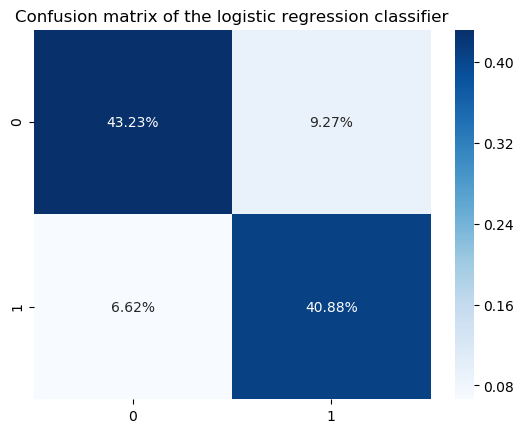

In [52]:
import numpy as np
import seaborn as sns
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Confusion matrix of the logistic regression classifier')
sns.heatmap(cm(Y_test, fake_detector_logistic.predict(X_test))/np.sum(cm(Y_test, fake_detector_logistic.predict(X_test))), annot=True,fmt='.2%', cmap='Blues')
plt.show()

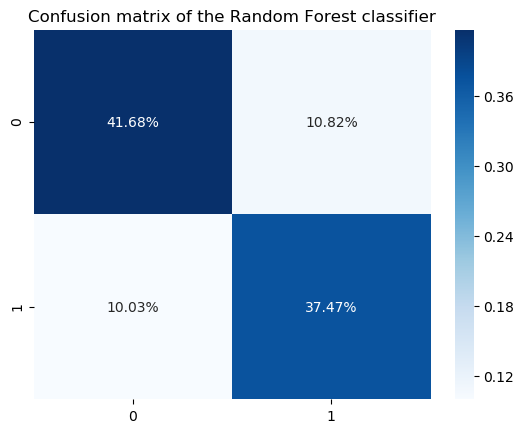

In [53]:
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm(Y_test, ranclf.predict(X_test))/np.sum(cm(Y_test, ranclf.predict(X_test))), annot=True,fmt='.2%', cmap='Blues')
plt.show()

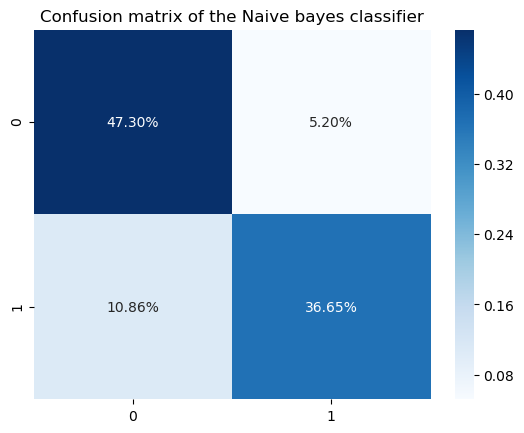

In [54]:
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Confusion matrix of the Naive bayes classifier')
sns.heatmap(cm(Y_test, fakenews_detector.predict(X_test))/np.sum(cm(Y_test, fakenews_detector.predict(X_test))), annot=True,fmt='.2%', cmap='Blues')
plt.show()

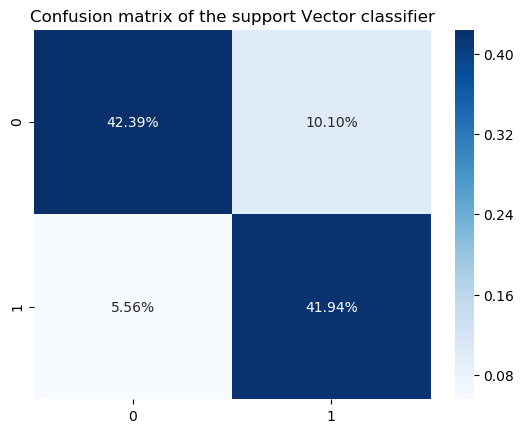

In [55]:
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Confusion matrix of the support Vector classifier')
sns.heatmap(cm(Y_test, fake_detector_svc.predict(X_test))/np.sum(cm(Y_test, fake_detector_svc.predict(X_test))), annot=True,fmt='.2%', cmap='Blues')
plt.show()

# conclusions derived from the above analysis

In [56]:
# All classification models are performing well with the test data
# Based on the AUC score and accuracy score and the PRECISION-RECALL learning Curve we can choose logistic Regression as our best Model 

In [ ]:
%matplotlib inline
#from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
#https://stackoverflow.com/questions/28160335/plot-a-document-tfidf-2d-graph
#newsgroups_train = fetch_20newsgroups(subset='train', 
                                      #categories=['alt.atheism', 'sci.space'])
#print(newsgroups_train.target)
#print(newsgroups_train)
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(df['headline']).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c=df['is_sarcastic'])
plt.show() 